In [19]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [20]:
import cv2
import numpy as np
import pandas as pd
import seaborn as ses
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score,recall_score,confusion_matrix,classification_report,accuracy_score,f1_score


from keras.layers import Dense, Activation, Dropout, BatchNormalization, LSTM,Conv2D, MaxPooling2D, Flatten
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical ,load_img, img_to_array
from tensorflow.keras.optimizers import RMSprop,SGD,Adam,Adadelta
from tensorflow.keras.models import load_model
from keras import callbacks
from keras.callbacks import EarlyStopping,ReduceLROnPlateau

import random
import os

In [28]:
image_generator = ImageDataGenerator(rescale=1./255, validation_split=0.3) 

train_dataset = image_generator.flow_from_directory(batch_size=15,
                                                 directory='/content/drive/MyDrive/AI Datasets/DATA COFFEE/Data train',
                                                 shuffle=True,
                                                 target_size=(150, 150), 
                                                 subset="training",
                                                 class_mode='categorical')

validation_dataset = image_generator.flow_from_directory(batch_size=15,
                                                 directory='/content/drive/MyDrive/AI Datasets/DATA COFFEE/Data train',
                                                 shuffle=True,
                                                 target_size=(150, 150), 
                                                 subset="validation",
                                                 class_mode='categorical')

Found 210 images belonging to 10 classes.
Found 90 images belonging to 10 classes.


In [29]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2))) 
model.add(Dropout(0.25))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))


model.compile(loss='categorical_crossentropy', optimizer='rmsprop',metrics=['accuracy'],run_eagerly=True)
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 batch_normalization_22 (Bat  (None, 148, 148, 32)     128       
 chNormalization)                                                
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 dropout_22 (Dropout)        (None, 74, 74, 32)        0         
                                                                 
 conv2d_19 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 batch_normalization_23 (Bat  (None, 72, 72, 64)      

In [30]:
history=model.fit(train_dataset,batch_size=15,epochs=50,verbose=1,validation_data=validation_dataset)

Epoch 1/50
14/14 [==============================] - 23s 2s/step - loss: 2.9278 - accuracy: 0.1619 - val_loss: 2.7739 - val_accuracy: 0.0889
Epoch 2/50
14/14 [==============================] - 23s 2s/step - loss: 1.9872 - accuracy: 0.3762 - val_loss: 6.7829 - val_accuracy: 0.1000
Epoch 3/50
14/14 [==============================] - 20s 1s/step - loss: 1.5185 - accuracy: 0.4952 - val_loss: 8.9478 - val_accuracy: 0.1000
Epoch 4/50
14/14 [==============================] - 20s 1s/step - loss: 1.1365 - accuracy: 0.6286 - val_loss: 9.6016 - val_accuracy: 0.1000
Epoch 5/50
14/14 [==============================] - 21s 2s/step - loss: 0.7481 - accuracy: 0.7857 - val_loss: 11.3817 - val_accuracy: 0.1000
Epoch 6/50
14/14 [==============================] - 23s 2s/step - loss: 0.4026 - accuracy: 0.9000 - val_loss: 9.9045 - val_accuracy: 0.1222
Epoch 7/50
14/14 [==============================] - 20s 1s/step - loss: 0.3448 - accuracy: 0.9190 - val_loss: 7.9160 - val_accuracy: 0.1444
Epoch 8/50
14/14 [=

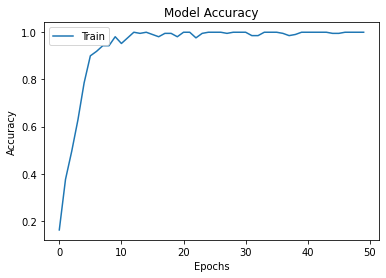

In [31]:
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train'])
plt.show()

In [32]:
train_dataset.class_indices


{'Arabica_Bourbon': 0,
 'Arabica_Catimor': 1,
 'Arabica_Catuai': 2,
 'Arabica_Moka': 3,
 'Arabica_Typica': 4,
 'Caturra': 5,
 'Cherry_Exelsa': 6,
 'Cherry_Liberica': 7,
 'Culi': 8,
 'Robusta': 9}

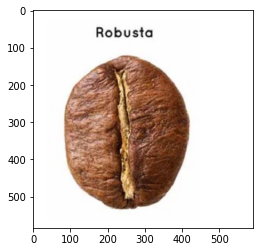

Robusta


In [79]:
filename = '/content/drive/MyDrive/AI Datasets/DATA COFFEE/PICS Test/Robusta1.jpg'

img = mpimg.imread(filename)
imgplot = plt.imshow(img)
plt.show()

img = load_img(filename,target_size = (150,150))
img = img_to_array(img)
img =  img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
rs = np.argmax(model.predict(img),axis= -1)
if rs==0:
  print('Arabica_Bourbon')
elif rs==1:
  print('Arabica_Catimor')
elif rs==2:
  print('Arabica_Catuai')
elif rs==3:
  print('Arabica_Moka')
elif rs==4:
  print('Arabica_Typica')
elif rs==5:
  print('Caturra')
elif rs==6:
  print('Cherry_Exelsa')
elif rs==7:
  print('Cherry_Liberica')
elif rs==8:
  print('Culi')
elif rs==9:
  print('Robusta')